<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/main/KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction 

In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover.

##“Birds of a feather flock together.”

Why do we need a K-NN Algorithm?


Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset. Consider the below diagram:

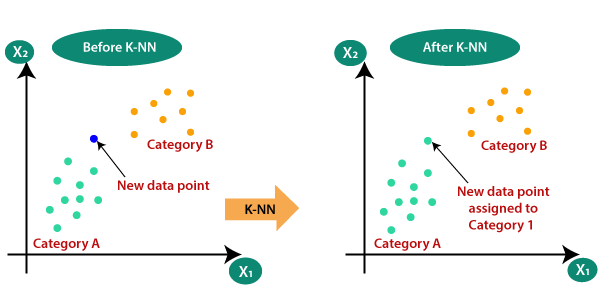

Suppose we have a new data point and we need to put it in the required category. Consider the below image:



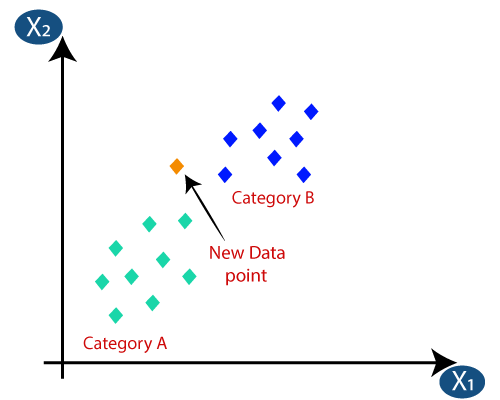

Firstly, we will choose the number of neighbors, so we will choose the k=5.
Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry. It can be calculated as:

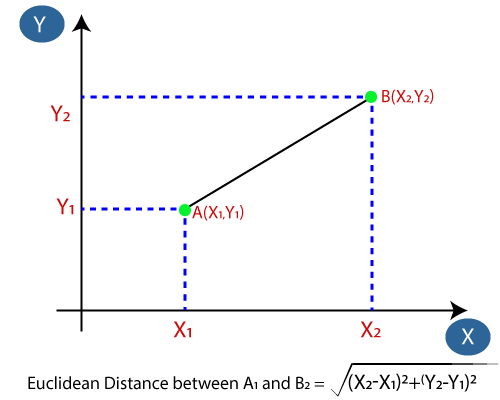

By calculating the Euclidean distance we got the nearest neighbors, as three nearest neighbors in category A and two nearest neighbors in category B. Consider the below image:

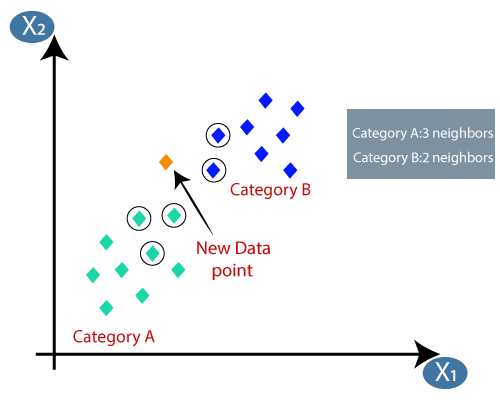

#1. Data Pre-processing step


In [14]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive

In [5]:
# Mounting the drive for loading the data
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/Data Science Learning Path/IMS Proschool/KNN Algorithm'
data_set = pd.read_csv('/content/drive/MyDrive/Data Science Learning Path/IMS Proschool/KNN Algorithm/knndata.csv')
data_set.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
knndata.csv


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:

#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

#2. Fitting the K-NN algorithm to the Training set

Fitting K-NN classifier to the Training data:

Now we will fit the K-NN classifier to the training data. To do this we will import the KNeighborsClassifier class of Sklearn Neighbors library. After 
importing the class, we will create the Classifier object of the class. The 
Parameter of this class will be

n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.

metric='minkowski': This is the default parameter and it decides the distance between the points.

p=2: It is equivalent to the standard Euclidean metric.

[KNN Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [8]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

Choosing the right value for K


To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

#3. Predicting the test result

In [28]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
print(f"The Accuracy of the model is {round(classifier.score(x_test,y_test)*100,2)}%")

The Accuracy of the model is 83.33%


#4. Test accuracy of the result(Creation of Confusion matrix)


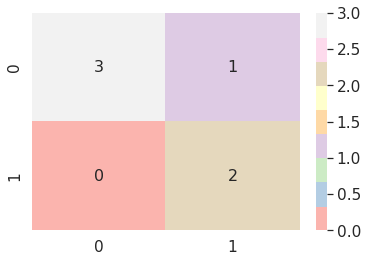

In [23]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, cmap='Pastel1',annot_kws={"size": 16}) # font size
mtp.show()

#5. Visualizing the test set result.

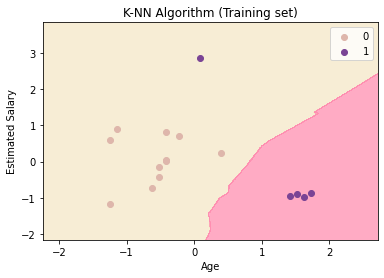

In [20]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('#F5E8C7', '#FF8FB1' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('#DEB6AB', '#7A4495'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

# ***Advantages***

1. The algorithm is simple and easy to implement.


2. There’s no need to build a model, tune several parameters, or make additional assumptions.

3. The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).

# ***Disadvantages***
1. The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase

2. Always needs to determine the value of K which may be complex some time.

3. The computation cost is high because of calculating the distance between the data points for all the training samples.

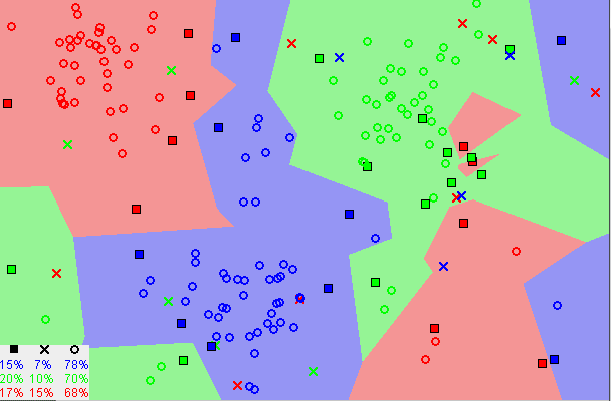

# ***Tips***


1. As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.

2. Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.

3. In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.